<a href="https://colab.research.google.com/github/josephinebrowne/audio.visualiser/blob/main/Librosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Superstylin'.wav to Superstylin'.wav


In [ ]:
audio_file = list(uploaded.keys())[0]
y, sr = librosa.load(audio_file)

In [ ]:
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print(f'Tempo: {tempo} BPM')


Tempo: [129.19921875] BPM


In [ ]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
# Find the index of the maximum magnitude along the frequency axis for each time frame
max_magnitude_indices = magnitudes.argmax(axis=0)
# Get the pitches at the maximum magnitude indices
dominant_pitches = pitches[max_magnitude_indices, range(magnitudes.shape[1])]
# Calculate the median of the dominant pitches to get a single representative pitch
pitch = np.median(dominant_pitches)
print(f'Pitch: {pitch} Hz')

Pitch: 302.20611572265625 Hz


In [ ]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

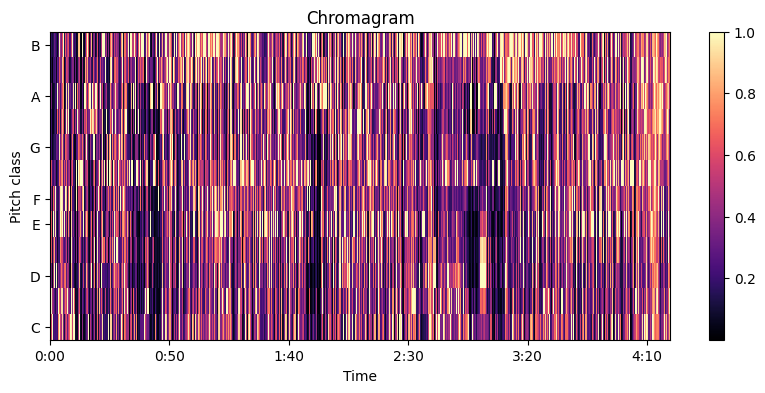

In [ ]:
# Compute the chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Display the chromagram
plt.figure(figsize=(10,4))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis ='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()


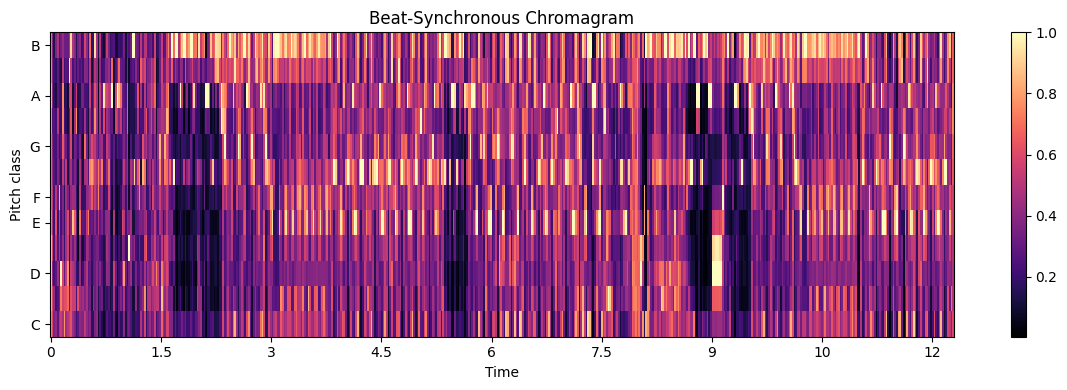

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
beat_chromagram = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)

# display chromagram
plt.figure(figsize=(12,4))
librosa.display.specshow(beat_chromagram, sr=sr, x_axis='time', y_axis='chroma', hop_length=512)
plt.colorbar()
plt.title('Beat-Synchronous Chromagram')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mr. Magic.wav to Mr. Magic.wav


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
audio_file = list(uploaded.keys())[0]
y, sr = librosa.load(audio_file)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print(f'Tempo: {tempo} BPM')

Tempo: [151.99908088] BPM


In [ ]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
# Find index of the maximum magnitude along frequency axis for each time frame
max_magnitude_indices = magnitudes.argmax(axis=0)
# Get the pitches at the maximum magnitude indices
dominant_pitches = pitches[max_magnitude_indices, range(magnitudes.shape[1])]
# Calculate the median of dominant pitches to get a representative pitch
pitch = np.median(dominant_pitches)
print(f'Pitch: {pitch} Hz')

Pitch: 433.05474853515625 Hz


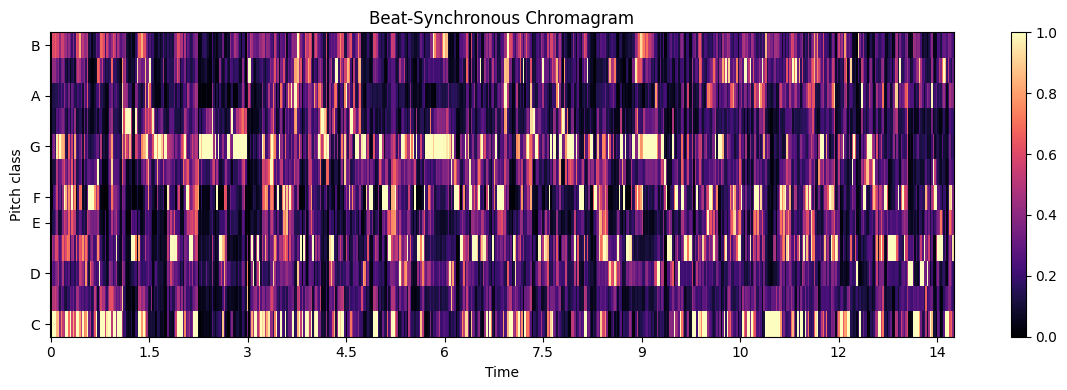

In [ ]:
beat_chromagram = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)

# display chromagram
plt.figure(figsize=(12,4))
librosa.display.specshow(beat_chromagram, sr=sr, x_axis='time', y_axis='chroma', hop_length=512)
plt.colorbar()
plt.title('Beat-Synchronous Chromagram')
plt.tight_layout()
plt.show()

In [ ]:

# Synchronize dominant pitches to beat frames
beat_synced_pitches = librosa.util.sync(dominant_pitches, beat_frames, aggregate=np.median)


print("Beat-synchronized pitches (Hz):")
print(beat_synced_pitches)

Beat-synchronized pitches (Hz):
[   0.       523.4105   522.5285   312.4301   352.55737  450.43985
  393.28912  395.49854  391.30365  173.89722  515.6138   260.84372
  260.77722  260.7967   260.65674  227.73883  194.3436   622.83575
  350.26224  503.86127  350.59897  591.68567  445.32547  594.735
  389.92993  214.93411  587.40424  697.5863   697.63055  539.8392
  260.8609   369.3821   292.77197  195.31384  246.24208  258.88083
  281.36993  258.64447  260.15317  257.5315   249.66304  255.56848
  269.8016   308.0113   259.37482  259.6834   261.7454   228.86234
  323.94736  402.67865  418.03476  410.76553  410.7934   389.7193
  625.78735  623.69824  207.66312  216.37656  622.7181   196.08118
  263.81998  253.3779   251.50284  256.76123  230.2389   230.70596
  615.7148   400.79776  397.05588  784.25305  380.29852  391.0045
  395.3604   408.047    470.25662  779.3549   776.6664   348.56375
  612.4346   148.32393  310.50717  306.73535  623.0779   405.94794
  349.3065   258.58377  262.08188  

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

    audio_file = list(uploaded.keys())[0]
    y, sr = librosa.load(audio_file)


    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    print(f'Tempo: {tempo} BPM')

    rms = librosa.feature.rms(y=y)[0]


    beat_synced_energy = librosa.util.sync(rms, beat_frames, aggregate=np.median)
    print("Beat-synchronized energy:")
    print(beat_synced_energy)

Tempo: [151.99908088] BPM
Beat-synchronized energy:
[0.         0.09433864 0.08851545 0.07601599 0.08325661 0.07498071
 0.1117224  0.08669525 0.10328423 0.10756843 0.09773785 0.08752912
 0.08614592 0.05964838 0.05084073 0.05788842 0.07616939 0.09930734
 0.0957067  0.09397023 0.1024349  0.08270865 0.10457596 0.09092443
 0.10500126 0.12041037 0.10606608 0.10907079 0.10499252 0.06361309
 0.06063448 0.05079638 0.0584665  0.09024245 0.09915207 0.08460926
 0.1100659  0.08683426 0.08806361 0.08864325 0.10478055 0.10779893
 0.09891199 0.08406804 0.08078963 0.06898414 0.06987453 0.08890669
 0.11754419 0.12646139 0.14712846 0.14410491 0.11819448 0.10937829
 0.13442484 0.11619298 0.07051121 0.09615476 0.10497005 0.10315169
 0.09766039 0.07786134 0.08845308 0.10325858 0.07514369 0.11283605
 0.13335247 0.13002366 0.1129178  0.15454167 0.09618725 0.12254712
 0.11630736 0.13901883 0.13996531 0.15201774 0.14719081 0.11725972
 0.09623615 0.10130617 0.08043282 0.08450943 0.09406584 0.08048756
 0.0627965

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mr. Magic.wav to Mr. Magic.wav


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Superstylin'.wav to Superstylin'.wav
